In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:
anime = pd.read_csv("data/anime.csv")
rating = pd.read_csv("data/rating.csv")

In [49]:
print(f"Shape of The Anime Dataset : {anime.shape}")
print(f"\nGlimpse of The Dataset :")
anime.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [50]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [51]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print(f"\nGlimpse of The Dataset :")
rating.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Rating Dataset : (7813737, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [52]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [53]:
print(f"Summary of The Anime Dataset :")
anime.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [54]:
anime.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
name,12294,12292,Saru Kani Gassen,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [55]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [56]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

After Dropping, Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [57]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [58]:
print(f"Summary of The Rating Dataset :")
rating.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Rating Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.000000,36727.956745,20997.946119,1.000000,18974.000000,36791.000000,54757.000000,73516.000000
anime_id,7813737.000000,8909.072104,8883.949636,1.000000,1240.000000,6213.000000,14093.000000,34519.000000
rating,7813737.000000,6.144030,3.727800,-1.000000,6.000000,7.000000,9.000000,10.000000


In [59]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


In [60]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


In [ ]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

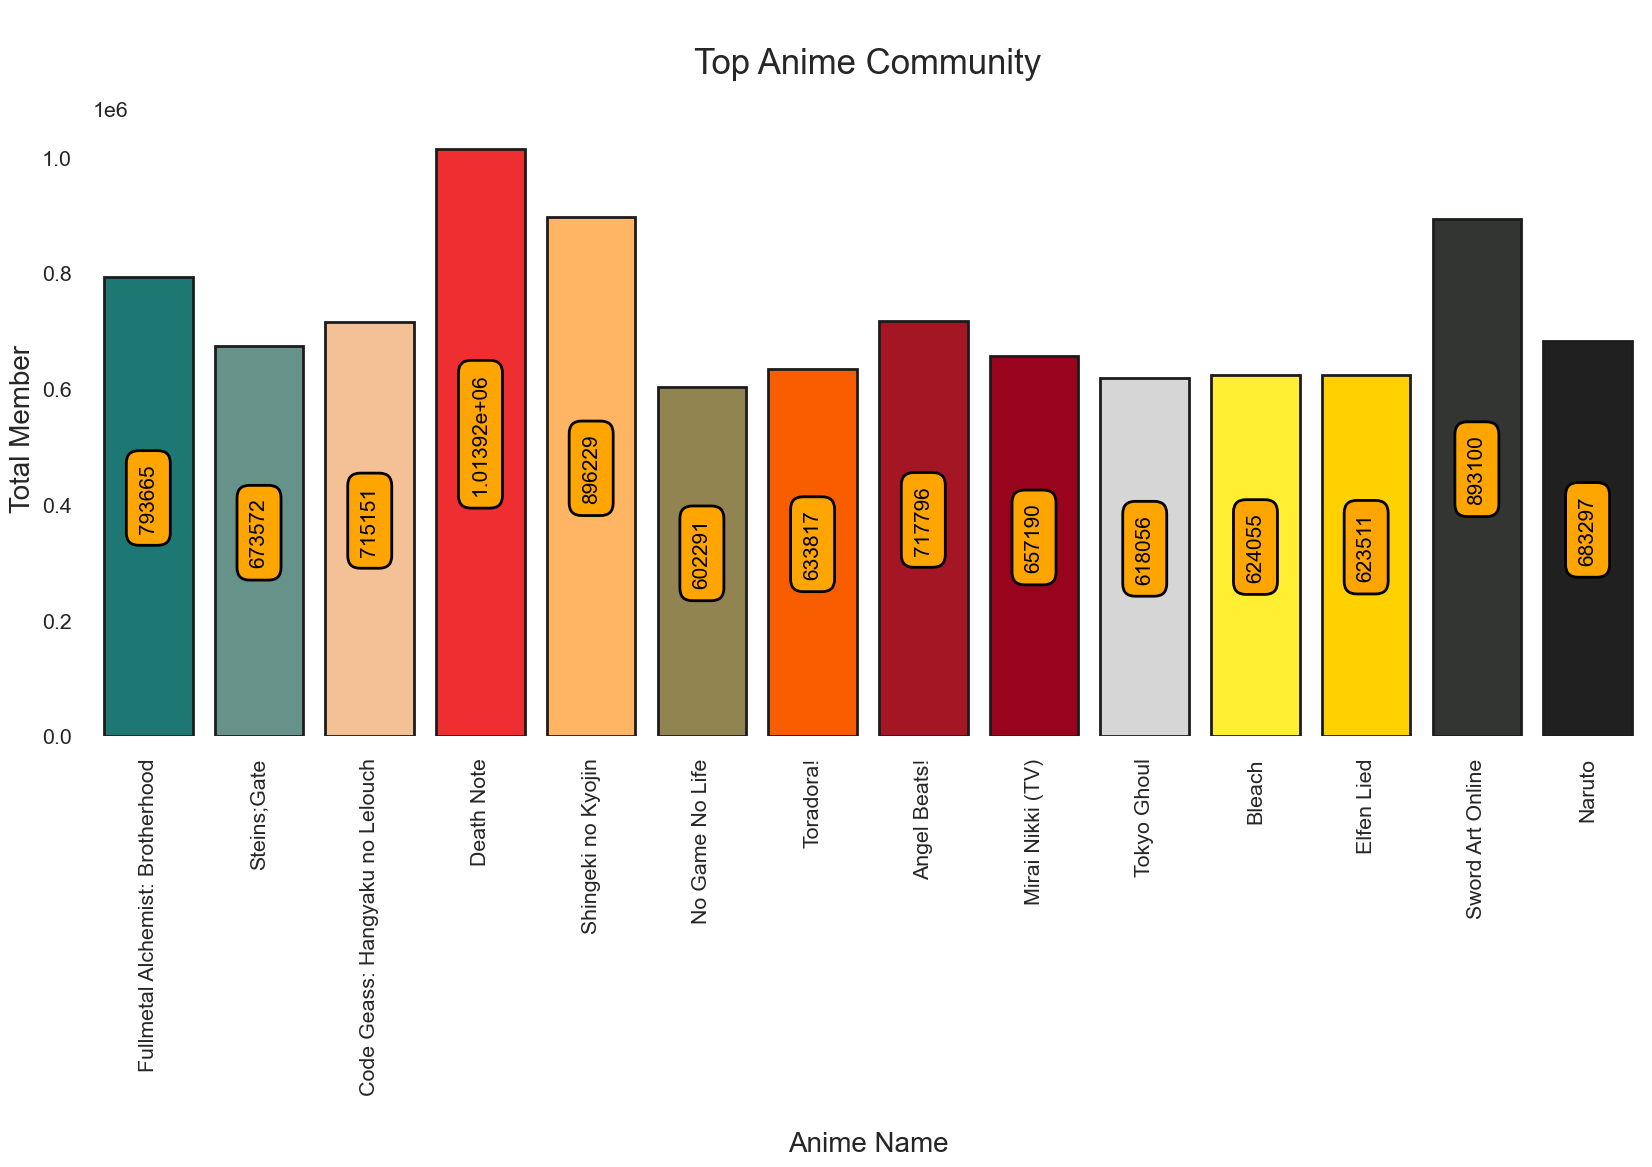

In [63]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.savefig("artifacts/plots/top_anime_community.png", dpi=150)
plt.show()

In [64]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime Categories :


type,TV,OVA,Movie,Special,ONA,Music
count,3402,3090,2111,1581,526,451


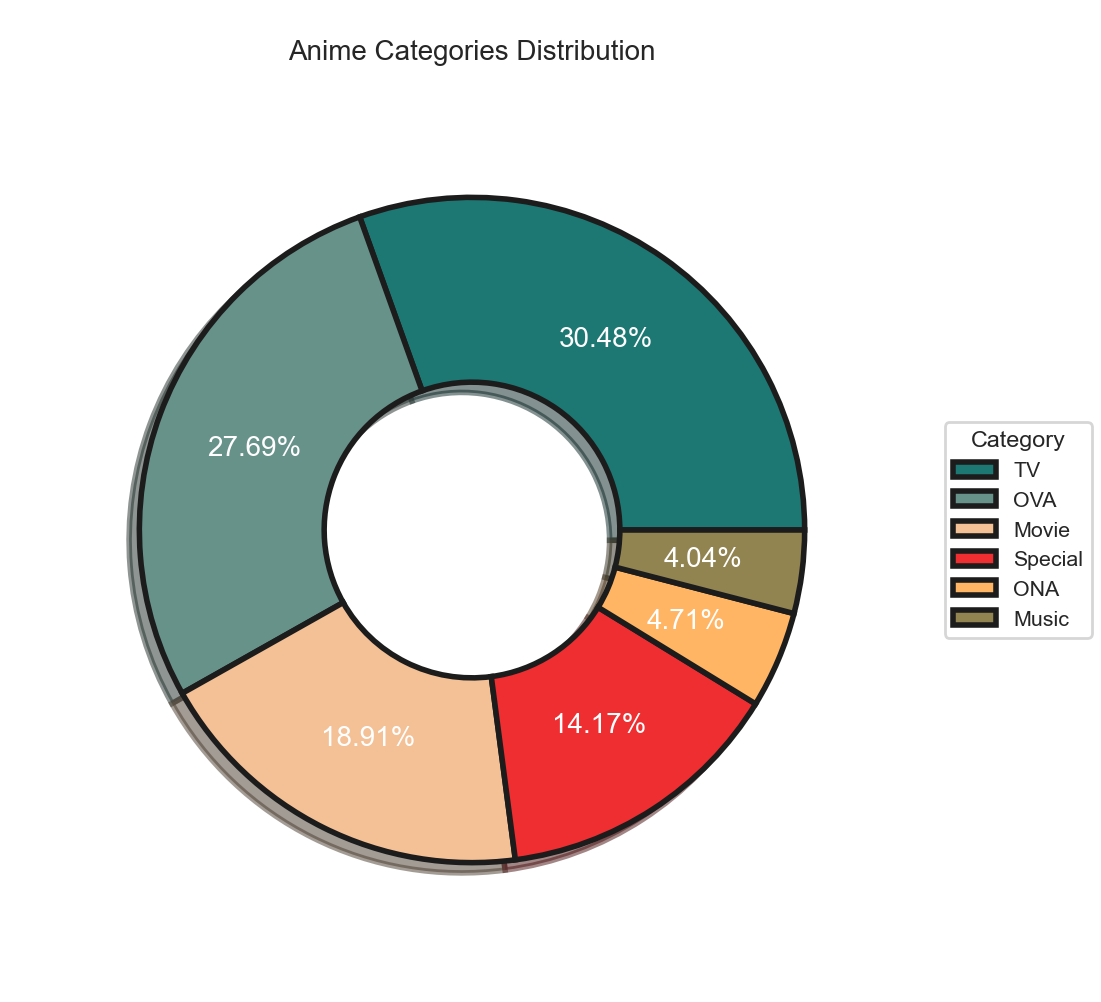

In [65]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.savefig("artifacts/plots/anime_categories_distribution.png", dpi=150)
plt.show()

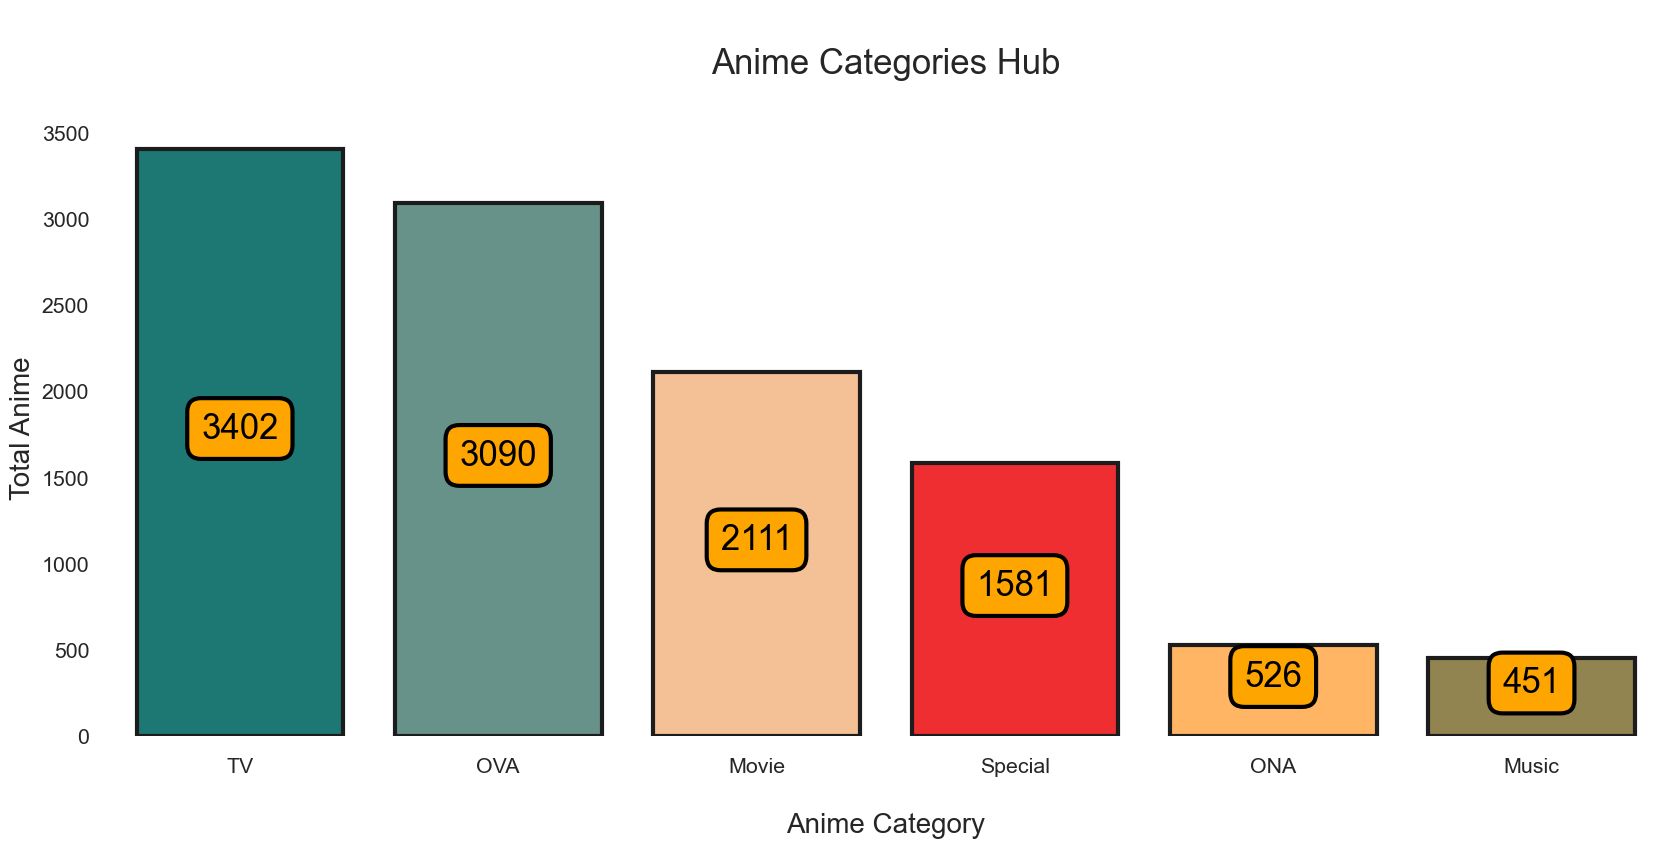

In [66]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.savefig("artifacts/plots/anime_categories_hub.png", dpi=150)
plt.show()

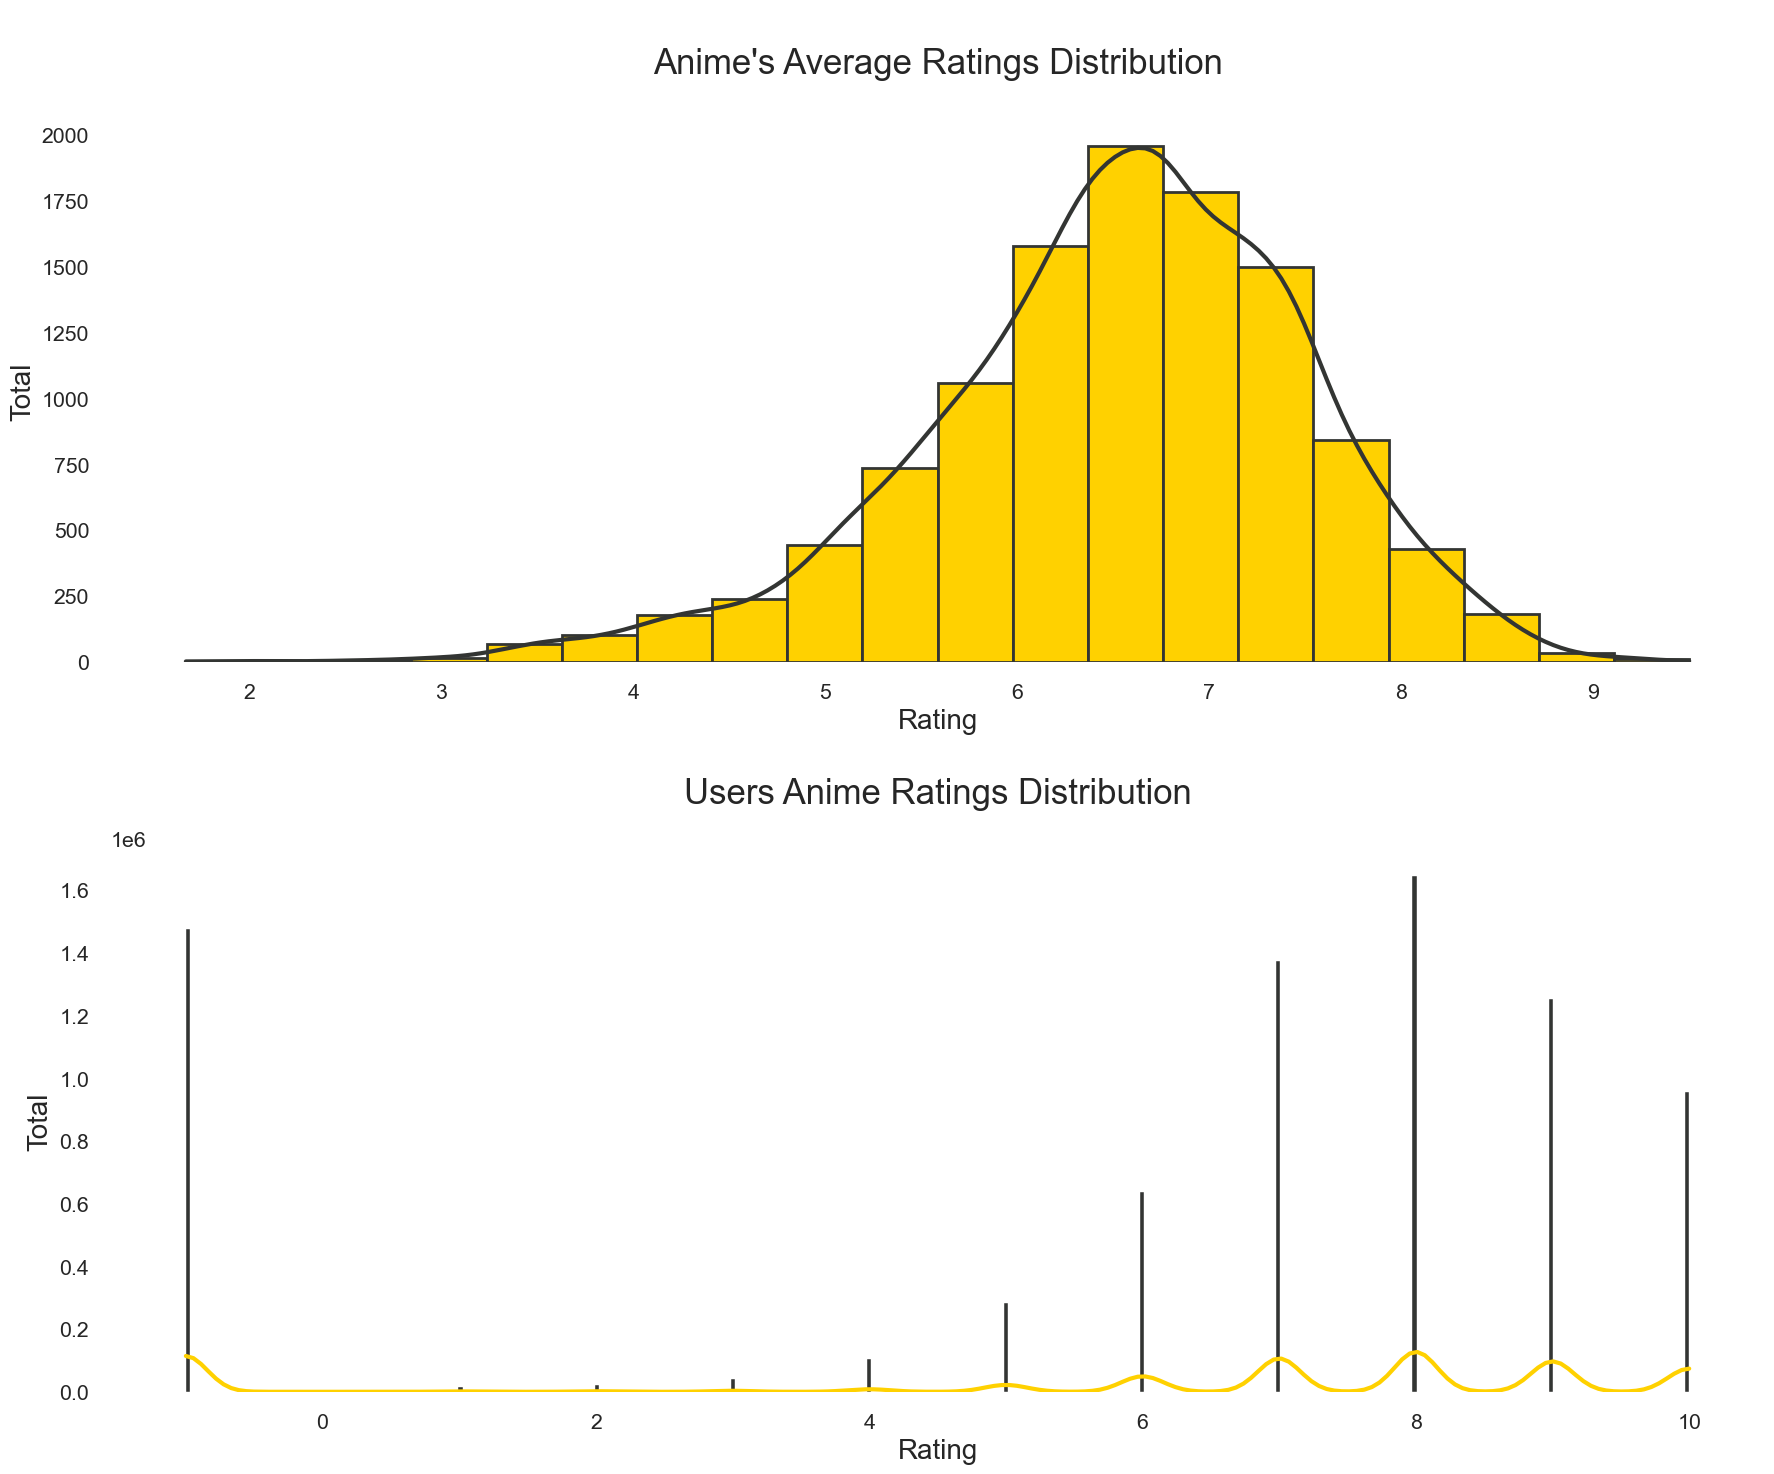

In [67]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.savefig("artifacts/plots/ratings_distribution_overall.png", dpi=150)
plt.show()

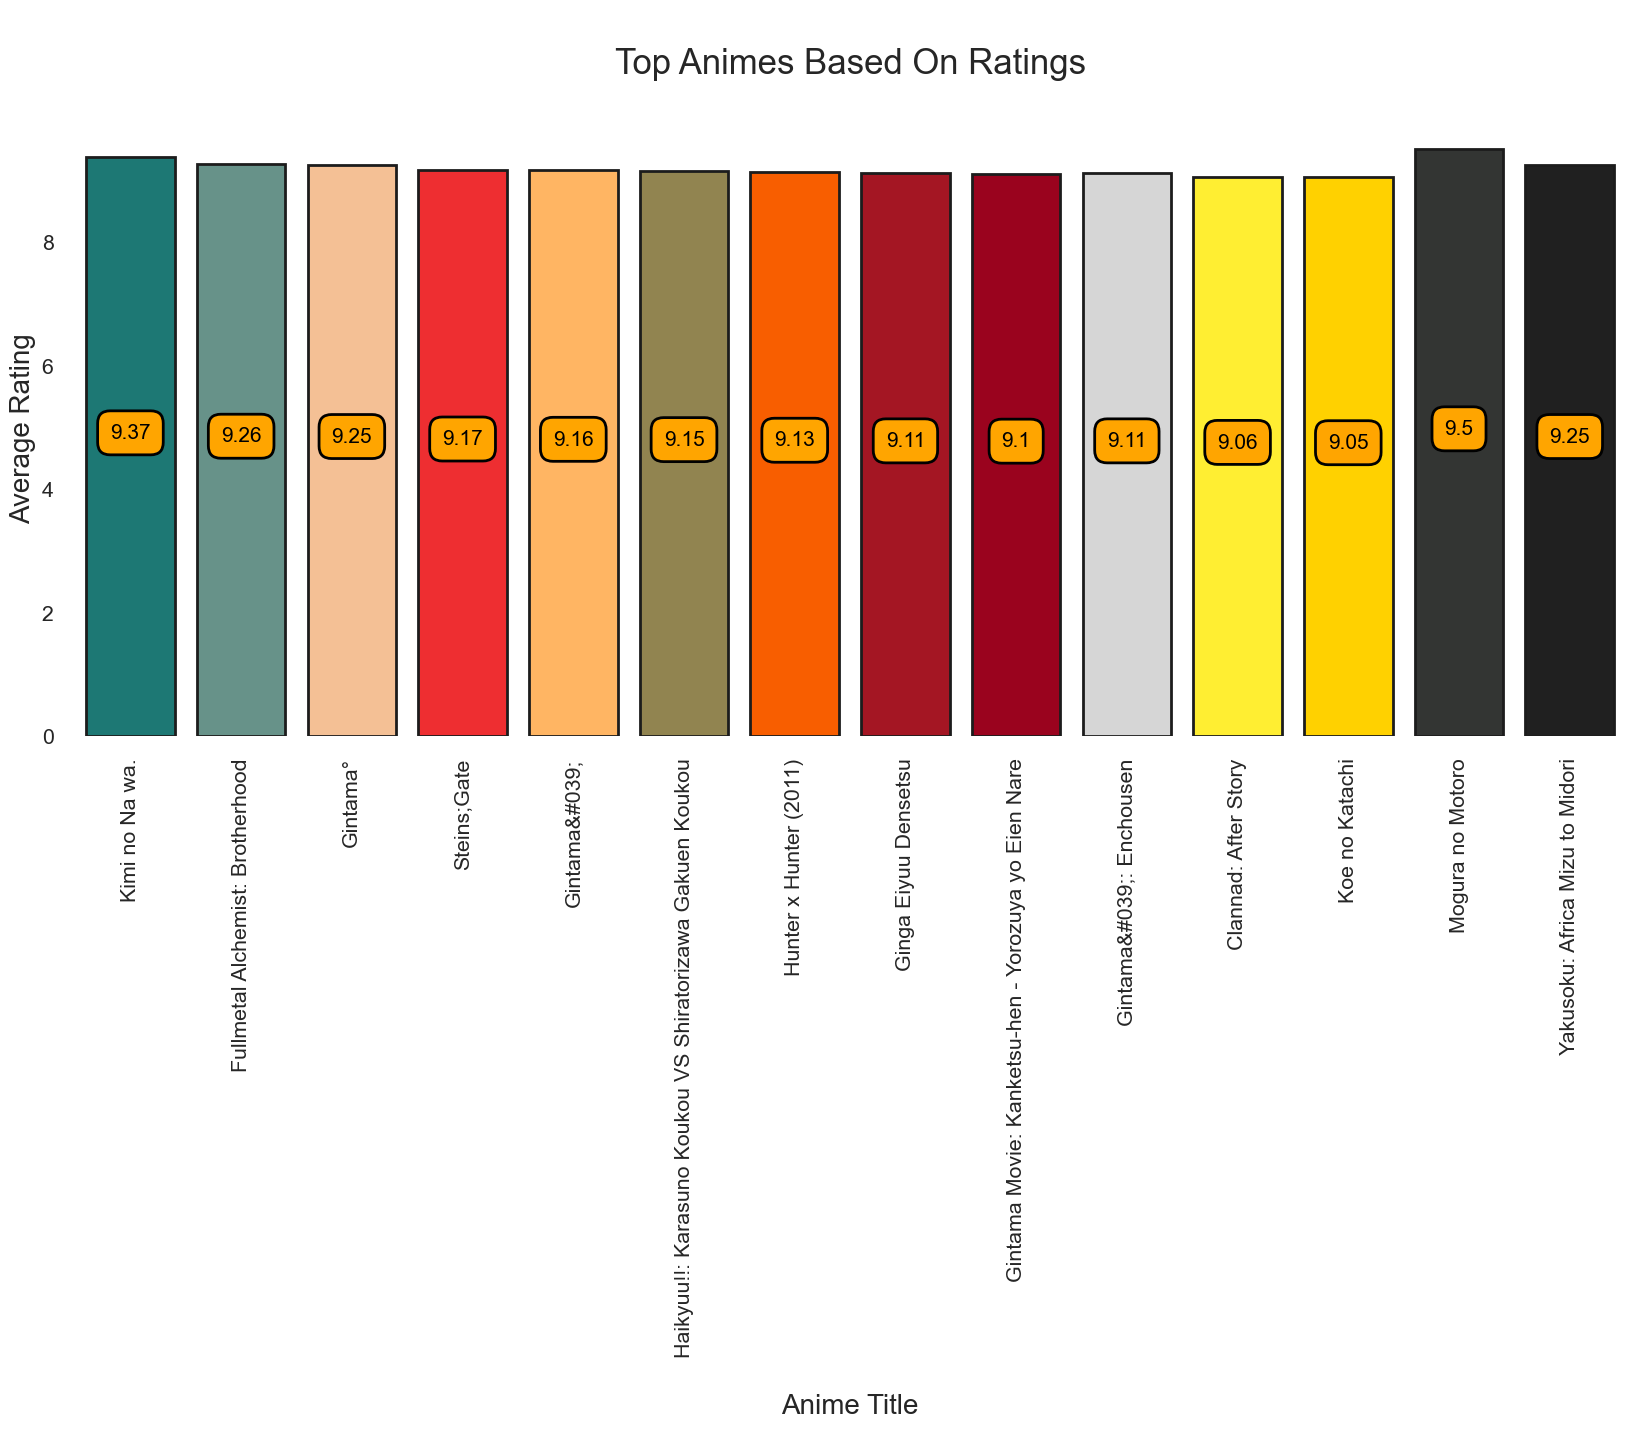

In [68]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.savefig("artifacts/plots/top_anime_ratings.png", dpi=150)
plt.show()

Let's explore the ratings distribution of TV category :



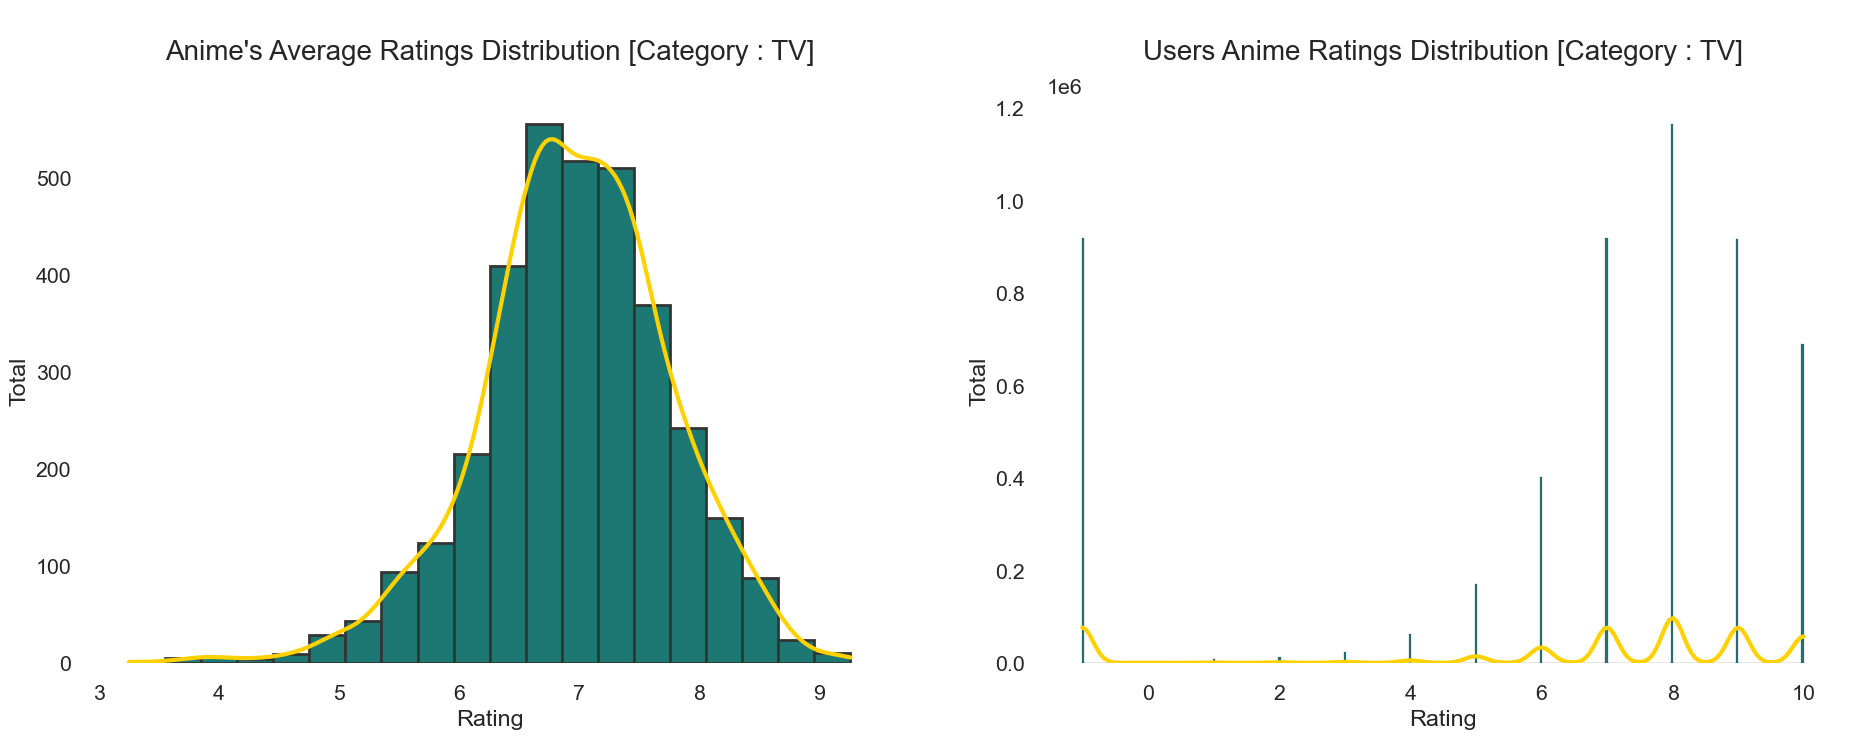

In [69]:
print("Let's explore the ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.savefig("artifacts/plots/ratings_distribution_tv.png", dpi=150)
plt.show()

Let's explore the ratings distribution of OVA category :



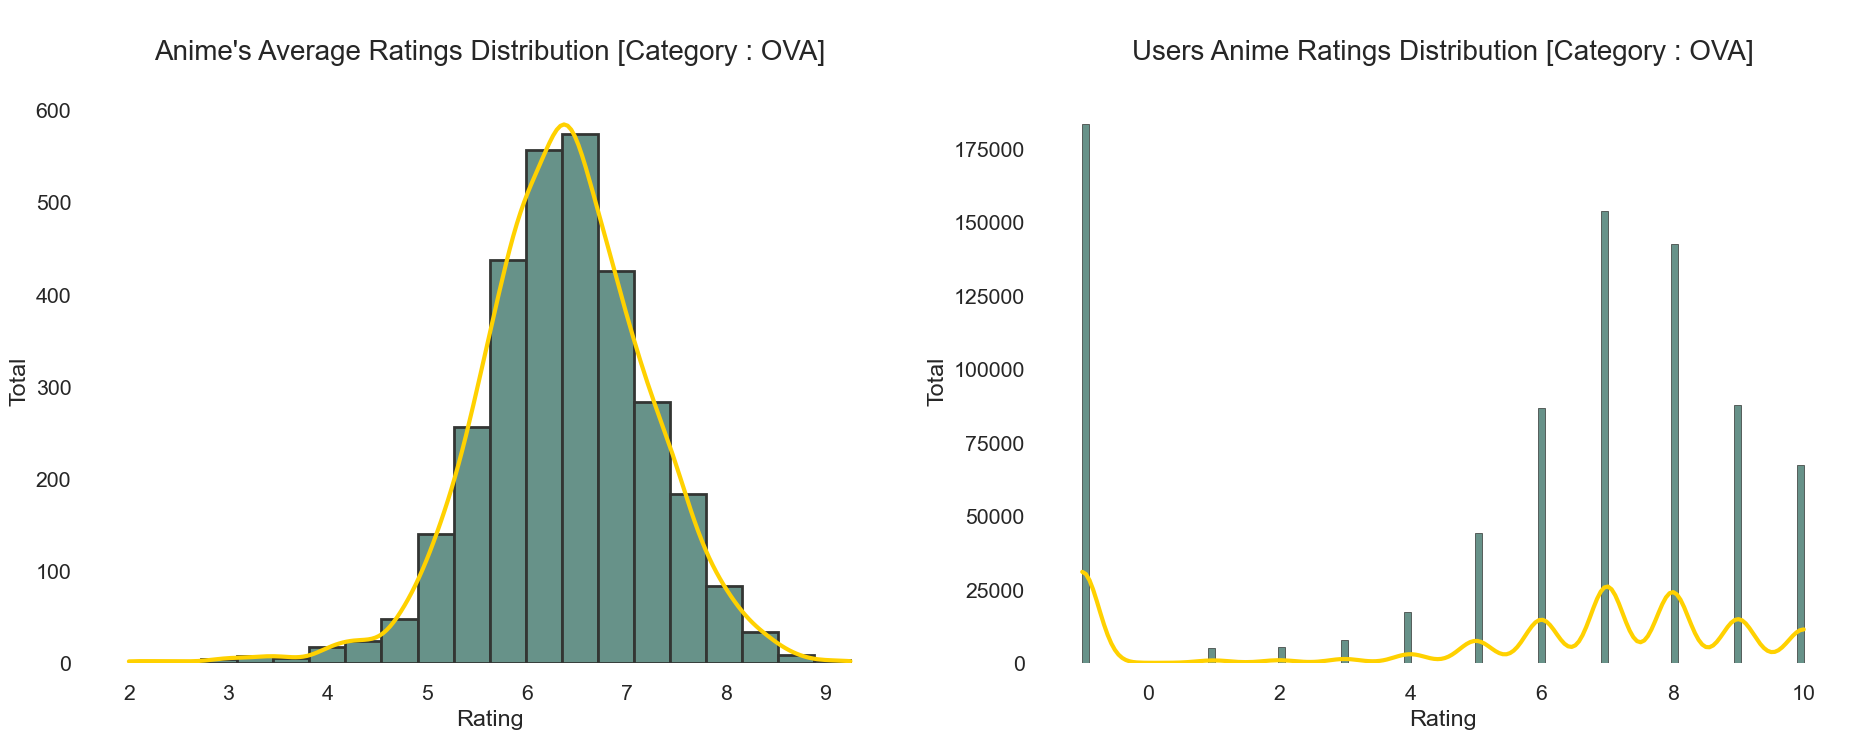

In [70]:
print("Let's explore the ratings distribution of OVA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.savefig("artifacts/plots/ratings_distribution_ova.png", dpi=150)
plt.show()

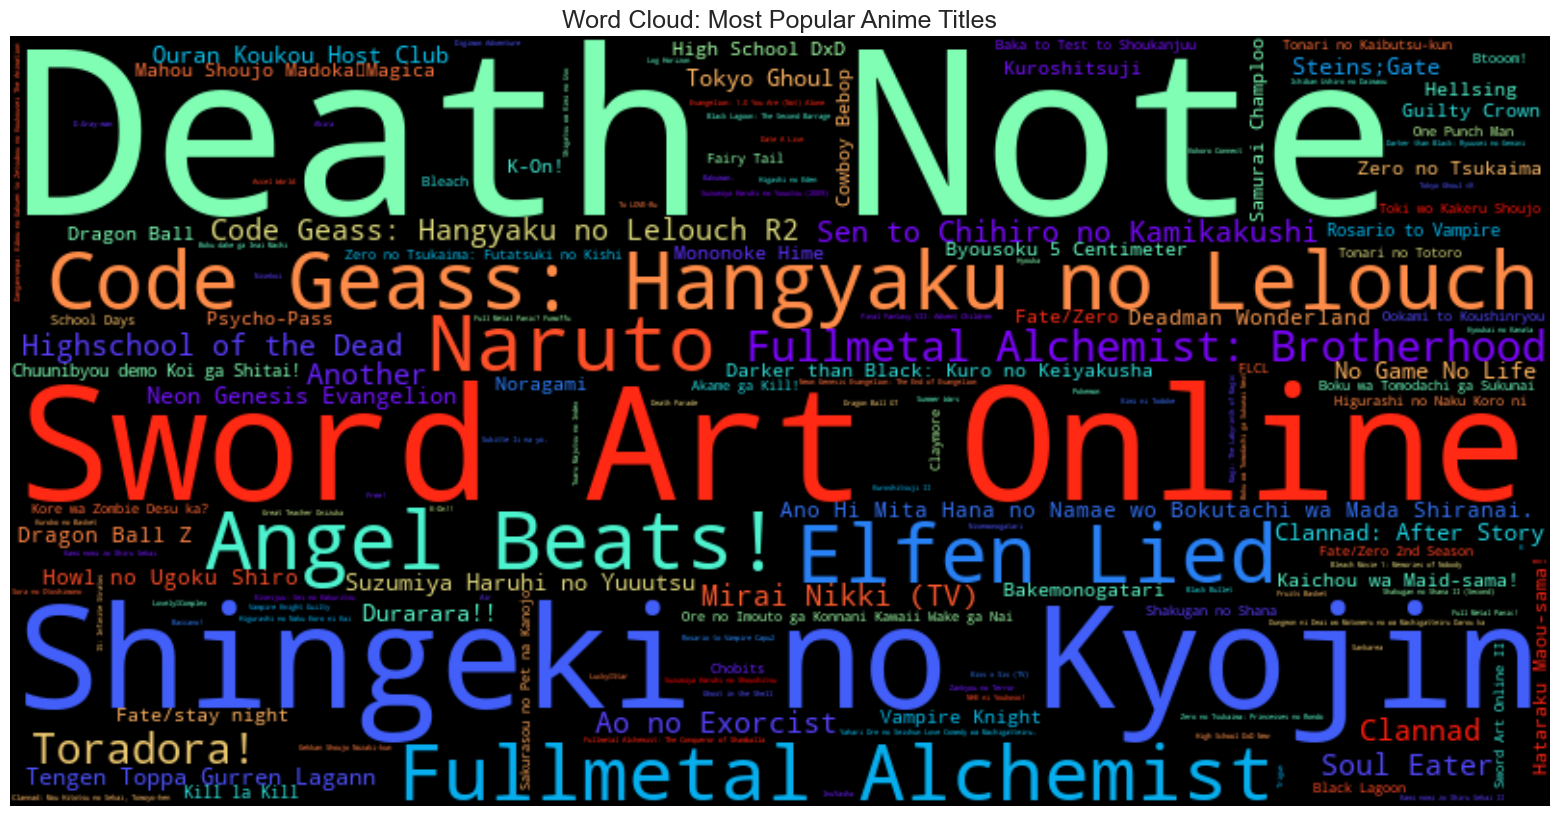

In [78]:
from wordcloud import WordCloud

# 1️⃣ Đếm số lượt rating cho mỗi anime
anime_popularity = rating["anime_id"].value_counts()

# 2️⃣ Map anime_id -> anime name (từ anime.csv)
anime_name_map = anime.set_index("anime_id")["name"].astype(str).to_dict()

# 3️⃣ Tạo frequency dict: {anime_name: count}
anime_name_freq = {
    anime_name_map[aid]: cnt
    for aid, cnt in anime_popularity.items()
    if aid in anime_name_map
}

# 4️⃣ Tạo WordCloud (GIỐNG HỆT CODE MẪU)
wc_anime = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="rainbow",
    max_words=200,
    max_font_size=120,
    collocations=False
).generate_from_frequencies(anime_name_freq)

# 5️⃣ Vẽ & lưu
plt.figure(figsize=(20, 10))
plt.imshow(wc_anime, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Most Popular Anime Titles", fontsize=18)

plt.savefig("artifacts/plots/anime_name_wordcloud.png", dpi=150)
plt.show()


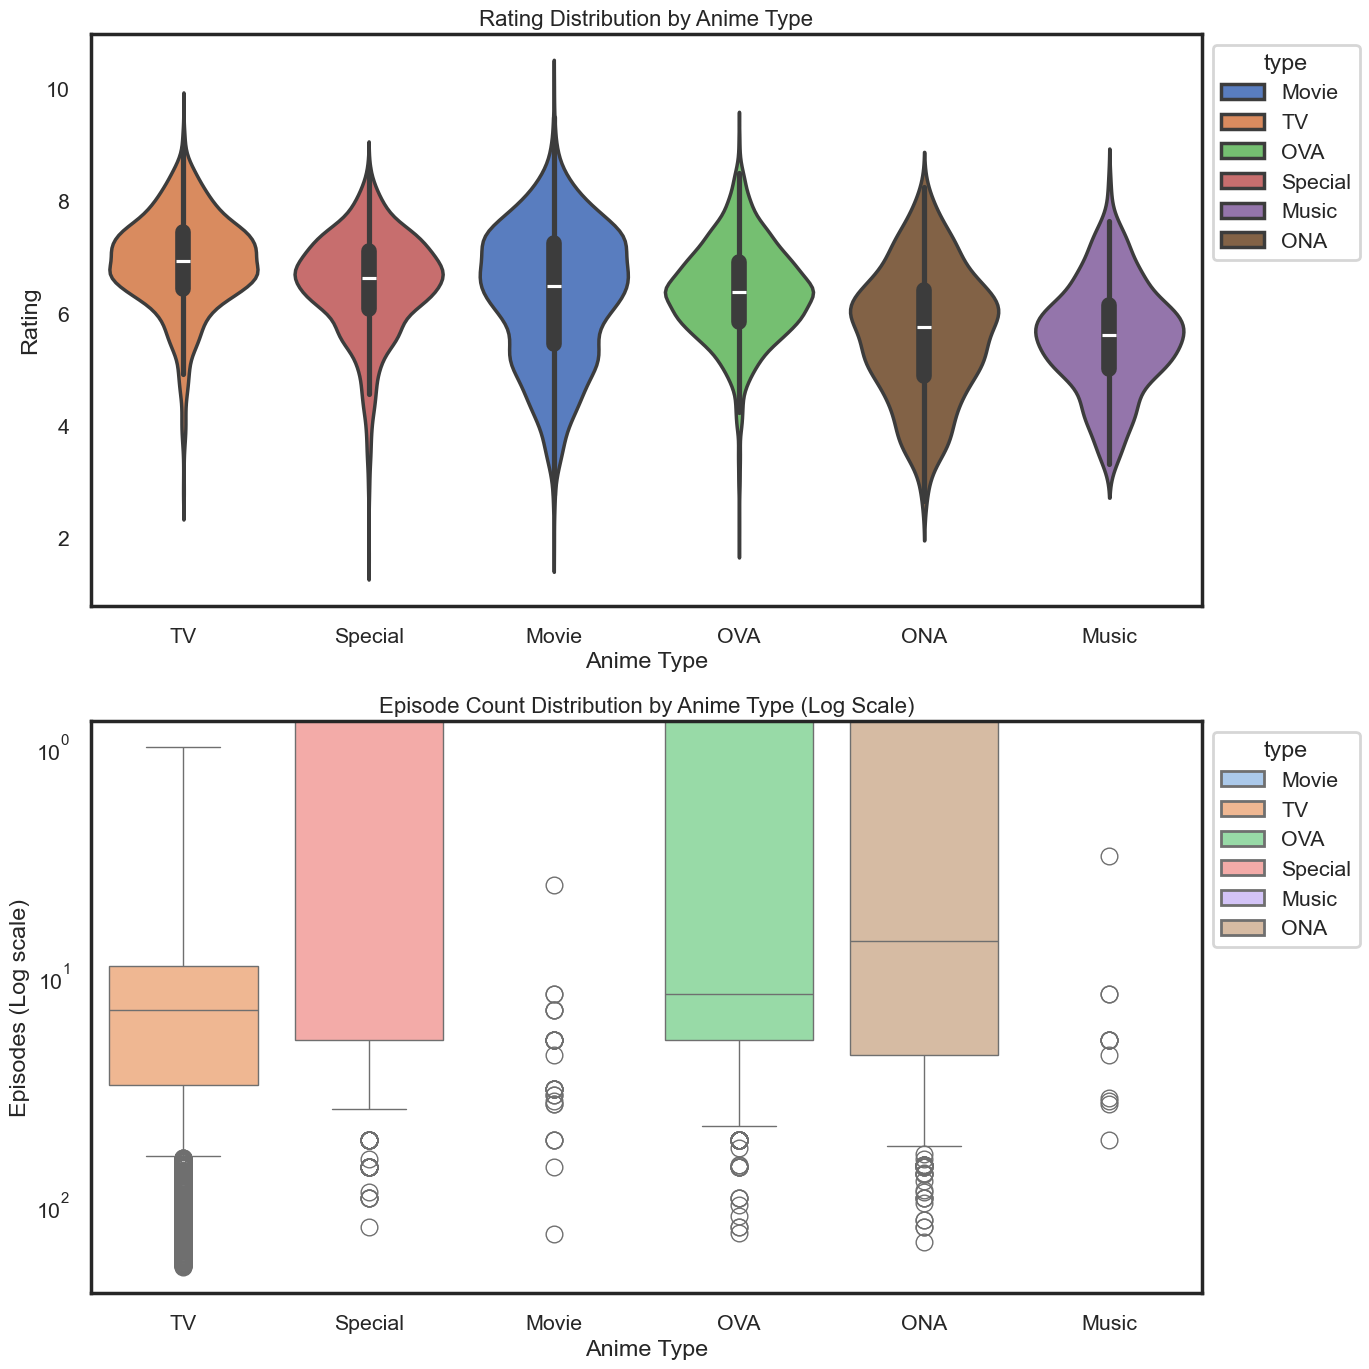

In [79]:
anime_df = anime.copy()
anime_df["rating"] = anime_df["rating"].astype(float)
anime_df["episodes"] = anime_df["episodes"].replace(0, np.nan)

order_type = anime_df.groupby("type")["rating"].median().sort_values(ascending=False).index

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Violin plot - Rating
sns.violinplot(
    x="type", y="rating", hue="type",
    data=anime_df, order=order_type,
    palette="muted", ax=ax[0], legend=True
)
ax[0].set_title("Rating Distribution by Anime Type", fontsize=16)
ax[0].set_xlabel("Anime Type")
ax[0].set_ylabel("Rating")
sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))

# Box plot - Episodes
sns.boxplot(
    x="type", y="episodes", hue="type",
    data=anime_df, order=order_type,
    palette="pastel", ax=ax[1], legend=True
)
ax[1].set_yscale("log")
ax[1].set_title("Episode Count Distribution by Anime Type (Log Scale)", fontsize=16)
ax[1].set_xlabel("Anime Type")
ax[1].set_ylabel("Episodes (Log scale)")
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("artifacts/plots/type_rating_episode_violin_box.png", dpi=150)
plt.show()


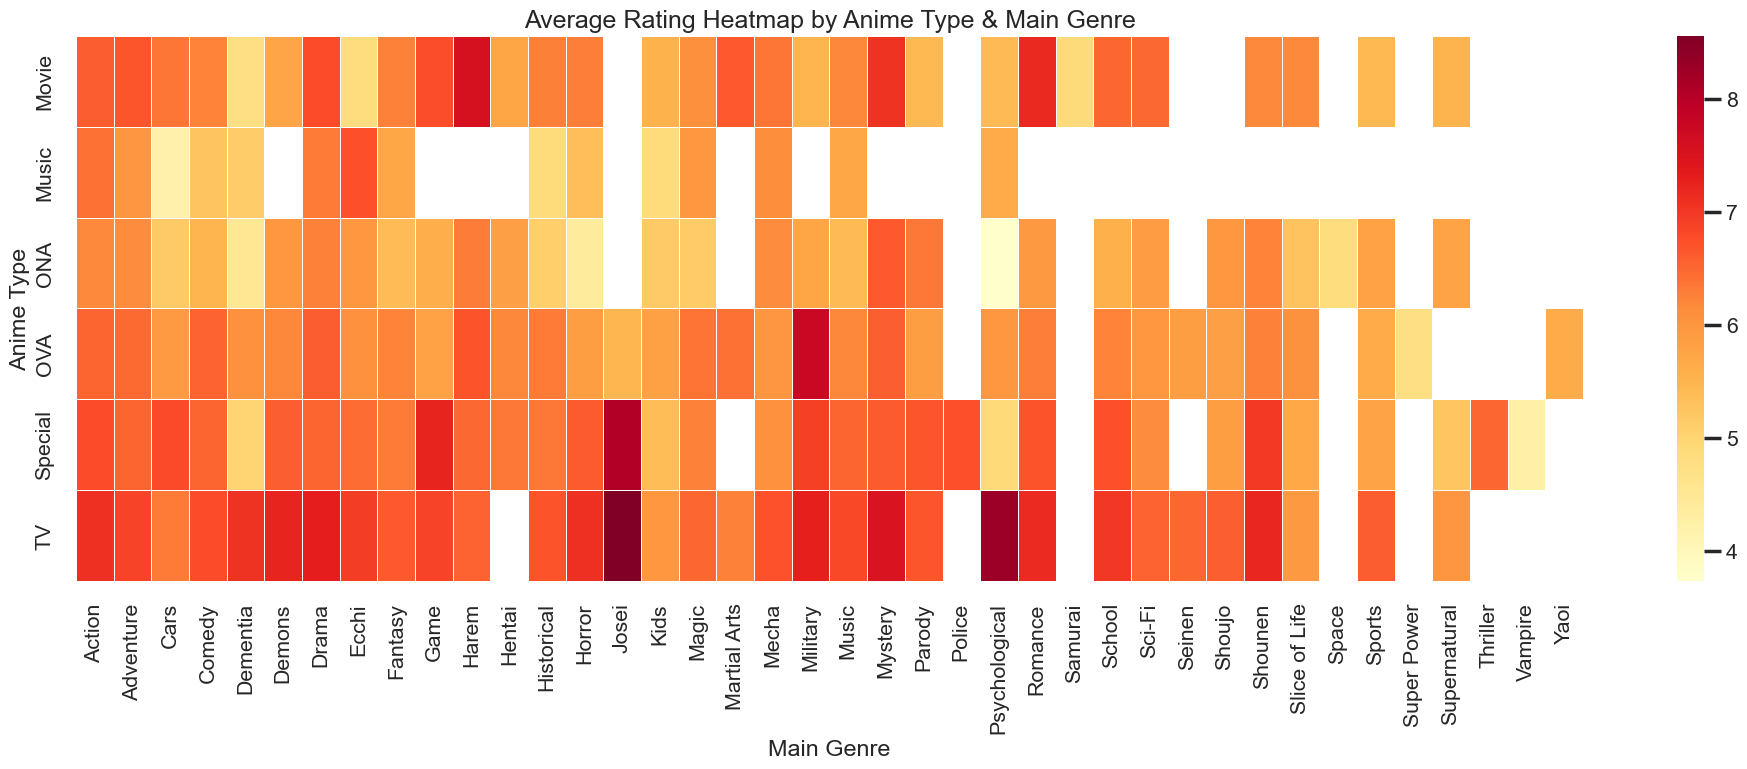

In [80]:
# Tách genre chính (genre đầu tiên)
anime_df["main_genre"] = anime_df["genre"].fillna("").apply(lambda x: x.split(",")[0])

heatmap_df = (
    anime_df
    .groupby(["type", "main_genre"])["rating"]
    .mean()
    .reset_index()
)

pivot_table = heatmap_df.pivot(
    index="type",
    columns="main_genre",
    values="rating"
)

plt.figure(figsize=(20, 8))
sns.heatmap(
    pivot_table,
    cmap="YlOrRd",
    linewidths=0.5,
    annot=False
)

plt.title("Average Rating Heatmap by Anime Type & Main Genre", fontsize=18)
plt.xlabel("Main Genre")
plt.ylabel("Anime Type")
plt.tight_layout()

plt.savefig("artifacts/plots/type_genre_rating_heatmap.png", dpi=150)
plt.show()


In [72]:
#loáº¡i bá» cÃ¡c rating -1
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


In [73]:
import numpy as np
import pandas as pd

df = fulldata.copy()

# 1) clean rating: loáº¡i -1 (náº¿u cÃ³)
df["user_rating"] = df["user_rating"].replace(-1, np.nan)
df = df.dropna(subset=["user_rating"])
df["user_rating"] = df["user_rating"].astype(float)

# 2) clean text
df["name"] = df["name"].astype(str)
df["genre"] = df["genre"].fillna("").astype(str)
df["type"]  = df["type"].fillna("Unknown").astype(str)

print("Raw rows:", len(df), "| users:", df["user_id"].nunique(), "| items:", df["anime_id"].nunique())


Raw rows: 6337145 | users: 69600 | items: 9892


In [74]:
def reduce_to_target(df, target_rows=500000,
                     min_user_ratings=50,
                     min_item_ratings=50,
                     max_iter=10,
                     seed=42):
    rng = np.random.default_rng(seed)
    tmp = df.copy()

    for _ in range(max_iter):
        user_cnt = tmp["user_id"].value_counts()
        item_cnt = tmp["anime_id"].value_counts()

        tmp = tmp[tmp["user_id"].isin(user_cnt[user_cnt >= min_user_ratings].index)]
        tmp = tmp[tmp["anime_id"].isin(item_cnt[item_cnt >= min_item_ratings].index)]

        if len(tmp) <= target_rows:
            break

        # náº¿u váº«n quÃ¡ lá»›n â†’ tÄƒng ngÆ°á»¡ng dáº§n
        min_user_ratings = int(min_user_ratings * 1.2)
        min_item_ratings = int(min_item_ratings * 1.2)

    # náº¿u sau lá»c váº«n > target â†’ sample "cháº¥t lÆ°á»£ng"
    if len(tmp) > target_rows:
        # weight: rating cao + members cao (log Ä‘á»ƒ khÃ´ng lá»‡ch quÃ¡)
        w = (tmp["user_rating"] - tmp["user_rating"].min() + 1.0) * np.log1p(tmp["members"].fillna(0) + 1)
        w = w / w.sum()
        idx = rng.choice(tmp.index.values, size=target_rows, replace=False, p=w.values)
        tmp = tmp.loc[idx].copy()

    tmp = tmp.reset_index(drop=True)
    return tmp

df_small = reduce_to_target(df, target_rows=500000, min_user_ratings=30, min_item_ratings=30)
print("Reduced rows:", len(df_small), "| users:", df_small["user_id"].nunique(), "| items:", df_small["anime_id"].nunique())


Reduced rows: 500000 | users: 12806 | items: 3378


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# 1) táº¡o text cho má»—i anime
items = (df_small[["anime_id","name","genre","type","episodes"]]
         .drop_duplicates("anime_id")
         .reset_index(drop=True))

items["text"] = (
    items["name"] + " [TYPE] " + items["type"] +
    " [GENRE] " + items["genre"].fillna("") +
    " [EP] " + items["episodes"].astype(str)
)

# 2) encode
model = SentenceTransformer('Alibaba-NLP/gte-multilingual-base', trust_remote_code=True)
item_emb = model.encode(items["text"].tolist(), batch_size=64, show_progress_bar=True, normalize_embeddings=True)

# mapping
id2row = {aid: i for i, aid in enumerate(items["anime_id"].values)}
row2id = items["anime_id"].values


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Batches: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 53/53 [00:53<00:00,  1.00s/it]


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# build index
u_ids = df_small["user_id"].unique()
i_ids = df_small["anime_id"].unique()

u2i = {u:i for i,u in enumerate(u_ids)}
i2i = {a:i for i,a in enumerate(i_ids)}

rows = df_small["user_id"].map(u2i).values
cols = df_small["anime_id"].map(i2i).values
vals = df_small["user_rating"].values

R = csr_matrix((vals, (rows, cols)), shape=(len(u_ids), len(i_ids)))

# center theo user mean Ä‘á»ƒ CF á»•n Ä‘á»‹nh hÆ¡n
user_mean = np.array(R.sum(axis=1)).ravel() / np.maximum(1, np.array((R != 0).sum(axis=1)).ravel())
R_centered = R.copy()
R_centered.data = R_centered.data - user_mean[rows]

# train SVD
n_factors = 64
svd = TruncatedSVD(n_components=n_factors, random_state=42)
U = svd.fit_transform(R_centered)          # (n_users, k)
V = svd.components_.T                      # (n_items, k)

# item latent Ä‘á»ƒ tÃ­nh item-item similarity
V_norm = V / (np.linalg.norm(V, axis=1, keepdims=True) + 1e-9)


In [ ]:
def predict_cf(user_id, anime_id, global_mean=None):
    if global_mean is None:
        global_mean = float(df_small["user_rating"].mean())

    if user_id not in u2i or anime_id not in i2i:
        return global_mean

    ui = u2i[user_id]
    ii = i2i[anime_id]

    pred_centered = float(U[ui] @ V[ii])
    pred = pred_centered + float(user_mean[ui])
    return pred


In [ ]:
import math

def like_probability(pred_rating, threshold=8.0, scale=1.0):
    # sigmoid: rating cao hÆ¡n threshold â†’ xÃ¡c suáº¥t tÄƒng
    x = (pred_rating - threshold) / scale
    return 1 / (1 + math.exp(-x))


In [ ]:
def recommend_for_anime(query_anime_id, top_k=10, alpha=0.5, cf_candidates=200, cb_candidates=200):
    """
    alpha: weight cho CF (0..1). content weight = 1-alpha
    """
    if query_anime_id not in id2row or query_anime_id not in i2i:
        raise ValueError("Query anime_id khÃ´ng cÃ³ trong subset/model.")

    q_row = id2row[query_anime_id]
    q_emb = item_emb[q_row:q_row+1]  # normalized

    # --- Content candidates (cosine on embeddings)
    cb_sim = (item_emb @ q_emb.T).ravel()  # vÃ¬ normalized â†’ dot = cosine
    cb_top = np.argpartition(-cb_sim, cb_candidates+1)[:cb_candidates+1]

    # --- CF candidates (cosine on latent vectors)
    q_i = i2i[query_anime_id]
    q_v = V_norm[q_i:q_i+1]
    cf_sim = (V_norm @ q_v.T).ravel()
    cf_top = np.argpartition(-cf_sim, cf_candidates+1)[:cf_candidates+1]

    # union candidates
    cand_idx_items = set()
    for idx in cb_top:
        aid = row2id[idx]  # embedding index -> anime_id
        if aid in i2i: cand_idx_items.add(aid)
    for idx in cf_top:
        aid = i_ids[idx]   # svd item index -> anime_id
        if aid in id2row: cand_idx_items.add(aid)

    cand_idx_items.discard(query_anime_id)

    # query info
    q_genres = set(str(items.loc[id2row[query_anime_id], "genre"]).lower().split(", "))

    results = []
    for aid in cand_idx_items:
        # content sim
        cs = float(cb_sim[id2row[aid]]) if aid in id2row else 0.0
        # cf sim (item latent)
        cfs = float(cf_sim[i2i[aid]]) if aid in i2i else 0.0

        # hybrid score
        score = alpha * cfs + (1 - alpha) * cs

        # estimate like%: dÃ¹ng predicted rating trung bÃ¬nh cá»§a "nhÃ³m user thÃ­ch query"
        # cÃ¡ch Ä‘Æ¡n giáº£n: láº¥y nhá»¯ng user Ä‘Ã£ rate query, Ä‘oÃ¡n rating cá»§a há» cho candidate rá»“i láº¥y trung bÃ¬nh
        q_users = df_small[df_small["anime_id"] == query_anime_id]["user_id"].unique()
        if len(q_users) > 200:
            q_users = np.random.choice(q_users, 200, replace=False)

        preds = [predict_cf(u, aid) for u in q_users if u in u2i]
        pred_mean = float(np.mean(preds)) if preds else float(df_small["user_rating"].mean())
        like_pct = like_probability(pred_mean, threshold=8.0, scale=1.0) * 100

        # explanation
        rec_genres = set(str(items.loc[id2row[aid], "genre"]).lower().split(", "))
        genre_overlap = sorted([g for g in rec_genres if g and g in q_genres])

        results.append({
            "anime_id": aid,
            "name": items.loc[id2row[aid], "name"],
            "hybrid_score": score,
            "content_sim": cs,
            "cf_sim": cfs,
            "pred_rating_mean": pred_mean,
            "like_pct_est": like_pct,
            "genre_overlap": ", ".join(genre_overlap[:5]) if genre_overlap else "None",
            "why": f"Hybrid = {alpha:.2f}*CF({cfs:.3f}) + {1-alpha:.2f}*Content({cs:.3f}); "
                   f"Genres overlap: {', '.join(genre_overlap[:5]) if genre_overlap else 'None'}; "
                   f"Avg predicted rating among query-likers: {pred_mean:.2f} â†’ likeâ‰ˆ{like_pct:.1f}%"
        })

    out = pd.DataFrame(results)
    out = out.sort_values("hybrid_score", ascending=False).head(top_k).reset_index(drop=True)
    return out


In [ ]:
query_anime_id = int(items["anime_id"].sample(1, random_state=42).values[0])
query_name = items.loc[id2row[query_anime_id], "name"]
print("Query:", query_anime_id, query_name)

rec10 = recommend_for_anime(query_anime_id, top_k=10, alpha=0.4)
rec10[["anime_id","name","content_sim","cf_sim","hybrid_score","like_pct_est","why"]]


Query: 2413 Boin


,anime_id,name,content_sim,cf_sim,hybrid_score,like_pct_est,why
0,2411,Ane to Boin,0.920639,0.176724,0.623073,58.830982,Hybrid = 0.40*CF(0.177) + 0.60*Content(0.921);...
1,830,Sexfriend,0.743769,0.437987,0.621456,58.852158,Hybrid = 0.40*CF(0.438) + 0.60*Content(0.744);...
2,343,Tsukuyomi: Moon Phase,0.621053,0.616247,0.619130,58.994665,Hybrid = 0.40*CF(0.616) + 0.60*Content(0.621);...
3,9202,Seikon no Qwaser: Jotei no Shouzou,0.658527,0.534135,0.608770,58.916279,Hybrid = 0.40*CF(0.534) + 0.60*Content(0.659);...
4,2135,"Sora no Iro, Mizu no Iro",0.769916,0.348641,0.601406,58.843246,Hybrid = 0.40*CF(0.349) + 0.60*Content(0.770);...
5,6893,Oni Chichi,0.754536,0.365479,0.598913,58.994308,Hybrid = 0.40*CF(0.365) + 0.60*Content(0.755);...
6,3537,Cleavage,0.746461,0.371338,0.596412,58.888666,Hybrid = 0.40*CF(0.371) + 0.60*Content(0.746);...
7,524,Onegaiâ˜†Twins: Natsu wa Owaranai,0.683092,0.441484,0.586449,58.924814,Hybrid = 0.40*CF(0.441) + 0.60*Content(0.683);...
8,4358,Aniyome wa Ijippari,0.725565,0.368635,0.582793,58.875134,Hybrid = 0.40*CF(0.369) + 0.60*Content(0.726);...
9,6791,Kanokon: Manatsu no Dai Shanikusai,0.718948,0.378448,0.582748,58.680493,Hybrid = 0.40*CF(0.378) + 0.60*Content(0.719);...


In [ ]:
def train_test_split_per_user(df, user_col="user_id", item_col="anime_id",
                              rating_col="user_rating", test_ratio=0.2,
                              min_ratings=10, seed=42):
    rng = np.random.default_rng(seed)
    trains, tests = [], []

    for uid, g in df.groupby(user_col):
        if len(g) < min_ratings:
            continue
        idx = np.arange(len(g))
        rng.shuffle(idx)
        n_test = max(1, int(len(g) * test_ratio))
        tests.append(g.iloc[idx[:n_test]])
        trains.append(g.iloc[idx[n_test:]])

    return pd.concat(trains, ignore_index=True), pd.concat(tests, ignore_index=True)

train_df, test_df = train_test_split_per_user(df_small, min_ratings=10)
print("Train:", len(train_df), "Test:", len(test_df))


Train: 405090 Test: 94864


In [ ]:
def eval_rmse_mae_cf(test_df, n_samples=50_000, seed=42):
    rng = np.random.default_rng(seed)
    if len(test_df) > n_samples:
        test_eval = test_df.sample(n_samples, random_state=seed)
    else:
        test_eval = test_df

    y_true = test_eval["user_rating"].values
    y_pred = np.array([predict_cf(u, a) for u, a in zip(test_eval["user_id"].values, test_eval["anime_id"].values)])

    rmse = float(np.sqrt(np.mean((y_true - y_pred) ** 2)))
    mae  = float(np.mean(np.abs(y_true - y_pred)))
    return rmse, mae

rmse, mae = eval_rmse_mae_cf(test_df, n_samples=20000)
print("CF RMSE:", rmse, "CF MAE:", mae)


CF RMSE: 1.1136775203851088 CF MAE: 0.858927953658436


In [ ]:
from collections import defaultdict

def relevant_items(test_df, threshold=5.0):
    rel = test_df[test_df["user_rating"] >= threshold]
    return rel.groupby("user_id")["anime_id"].apply(set).to_dict()

# precompute item embedding lookup only for items in subset
emb_by_anime = {aid: item_emb[id2row[aid]] for aid in id2row.keys()}

def recommend_for_user(uid, train_df, k=10, alpha=0.5, max_hist=20, n_cand_pop=200, n_cand_content=200):
    """
    HÃ m gá»£i Ã½ hybrid cáº£i tiáº¿n:
    1. Láº¥y lá»‹ch sá»­ user.
    2. Táº¡o táº­p candidate tá»« 2 nguá»“n: Popularity (Ä‘á»ƒ Ä‘áº£m báº£o Ä‘á»™ phá»§) + Content Similarity (Ä‘á»ƒ báº¯t item niche).
    3. Cháº¥m Ä‘iá»ƒm vÃ  chuáº©n hÃ³a.
    """
    
    # --- 1. Láº¥y lá»‹ch sá»­ user ---
    hist = train_df[train_df["user_id"] == uid].sort_values("user_rating", ascending=False)
    if len(hist) == 0:
        return []

    # Chá»‰ láº¥y items cÃ³ trong táº­p huáº¥n luyá»‡n/embedding
    valid_hist_items = [a for a in hist["anime_id"].values if a in id2row and a in i2i]
    if not valid_hist_items:
        return []
        
    # User Centroid (Sá»Ÿ thÃ­ch ná»™i dung cá»§a user)
    hist_emb_vecs = [item_emb[id2row[a]] for a in valid_hist_items[:max_hist]] # Láº¥y max_hist item gáº§n nháº¥t
    user_centroid = np.mean(hist_emb_vecs, axis=0)
    user_centroid = user_centroid / (np.linalg.norm(user_centroid) + 1e-9)
    
    seen = set(valid_hist_items)

    # --- 2. Táº¡o táº­p Candidate (Quan trá»ng Ä‘á»ƒ tÄƒng Recall) ---
    candidates = set()

    # Nguá»“n A: Top Popular items (Ä‘á»ƒ khÃ´ng bá» lá»¡ trend)
    # LÆ°u Ã½: popular_items nÃªn Ä‘Æ°á»£c tÃ­nh toÃ¡n trÆ°á»›c á»Ÿ global scope Ä‘á»ƒ nhanh hÆ¡n, á»Ÿ Ä‘Ã¢y mÃ¬nh dÃ¹ng táº¡m logic cÅ©
    popular_items = df_small["anime_id"].value_counts().head(n_cand_pop).index.tolist()
    candidates.update([a for a in popular_items if a not in seen and a in i2i])

    # Nguá»“n B: Content-based Neighbors (Items giá»‘ng vá»›i user_centroid nháº¥t)
    # TÃ­nh dot product giá»¯a centroid vÃ  Táº¤T Cáº¢ item embeddings
    # item_emb lÃ  matrix (N_items, 768), user_centroid lÃ  (768,)
    # Káº¿t quáº£ cos_sims lÃ  (N_items,)
    cos_sims = item_emb @ user_centroid 
    
    # Láº¥y top indices cÃ³ similarity cao nháº¥t
    top_content_idx = np.argpartition(-cos_sims, n_cand_content)[:n_cand_content]
    
    # Map tá»« row index vá» anime_id
    for idx in top_content_idx:
        aid = row2id[idx]
        if aid not in seen and aid in i2i: # Pháº£i cÃ³ trong i2i Ä‘á»ƒ tÃ­nh CF
            candidates.add(aid)

    candidate_list = list(candidates)
    if not candidate_list:
        return []

    # --- 3. Cháº¥m Ä‘iá»ƒm Hybrid & Chuáº©n hÃ³a ---
    
    # TÃ­nh raw scores
    cf_scores = []
    content_scores = []
    
    for aid in candidate_list:
        # CF Score (SVD)
        cf_val = predict_cf(uid, aid)
        cf_scores.append(cf_val)
        
        # Content Score (Cosine)
        # Táº­n dá»¥ng cos_sims Ä‘Ã£ tÃ­nh á»Ÿ trÃªn Ä‘á»ƒ khÃ´ng pháº£i tÃ­nh láº¡i
        row_idx = id2row.get(aid)
        if row_idx is not None:
            c_val = cos_sims[row_idx]
        else:
            c_val = 0.0
        content_scores.append(c_val)

    # Chuyá»ƒn vá» numpy array Ä‘á»ƒ xá»­ lÃ½
    cf_scores = np.array(cf_scores)
    content_scores = np.array(content_scores)

    # HÃ m chuáº©n hÃ³a min-max an toÃ n
    def minmax_scale(arr):
        mn, mx = arr.min(), arr.max()
        if mx - mn == 0: return np.zeros_like(arr) + 0.5 # Náº¿u táº¥t cáº£ báº±ng nhau
        return (arr - mn) / (mx - mn)

    cf_norm = minmax_scale(cf_scores)
    content_norm = minmax_scale(content_scores)

    # TÃ­nh Ä‘iá»ƒm cuá»‘i cÃ¹ng
    final_scores = alpha * cf_norm + (1 - alpha) * content_norm
    
    # Zip láº¡i vÃ  sort
    final_results = list(zip(candidate_list, final_scores))
    final_results.sort(key=lambda x: x[1], reverse=True)

    return [x[0] for x in final_results[:k]]

def eval_precision_recall_at_k(train_df, test_df, k=10, threshold=8.0, max_users=3000, seed=42):
    rel = relevant_items(test_df, threshold=threshold)
    users = list(rel.keys())
    rng = np.random.default_rng(seed)
    if len(users) > max_users:
        users = rng.choice(users, max_users, replace=False).tolist()

    precisions, recalls = [], []
    for uid in users:
        recs = recommend_for_user(uid, train_df, k=k)
        hits = sum(1 for a in recs if a in rel[uid])
        precisions.append(hits / k)
        recalls.append(hits / max(1, len(rel[uid])))

    return float(np.mean(precisions)), float(np.mean(recalls)), len(users)

p10, r10, n = eval_precision_recall_at_k(train_df, test_df, k=10, threshold=8.0, max_users=800)
print(f"Users evaluated: {n} | Precision@10: {p10:.4f} | Recall@10: {r10:.4f}")


Users evaluated: 800 | Precision@10: 0.0715 | Recall@10: 0.1615


In [ ]:
import os, numpy as np

os.makedirs("artifacts", exist_ok=True)
os.makedirs("artifacts/plots", exist_ok=True)

# LÆ°u items (meta anime) vÃ  df_small (dÃ¹ng Ä‘á»ƒ láº¥y q_users + mean rating, popularity...)
items.to_csv("artifacts/items.csv", index=False)
df_small.to_csv("artifacts/df_small.csv", index=False)

# LÆ°u embeddings + SVD matrices
np.save("artifacts/item_emb.npy", item_emb.astype(np.float32))
np.save("artifacts/U.npy", U.astype(np.float32))
np.save("artifacts/V.npy", V.astype(np.float32))
np.save("artifacts/V_norm.npy", V_norm.astype(np.float32))
np.save("artifacts/user_mean.npy", user_mean.astype(np.float32))

# LÆ°u mapping ids (numpy lÆ°u Ä‘Æ°á»£c array)
np.save("artifacts/u_ids.npy", u_ids)
np.save("artifacts/i_ids.npy", i_ids)

print("âœ… Saved artifacts to ./artifacts/")


âœ… Saved artifacts to ./artifacts/
